# Практика
Используемые библиотеки

In [1]:
import pandas as pd
import numpy as np
import requests
import io
import re
from tqdm import tqdm
import random
from collections import Counter
from matplotlib import pyplot as plt

C:\Users\darmorezov\AppData\Local\Programs\Python\Python38-32\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


## Загрузка DataFrame
### Задача 1
На основании данных портала "Открытые данные России" о результатах Химического анализа родника в Нескучном саду https://data.gov.ru/opendata/7708660670-rodnik-neskuchniy-sad
средствами библиотеки __Pandas__ сформируйте поле выводов по каждому анализирумомому параметру.
Например, по показателю _pH_ получен результат _8.4 единицы pH_ при нормативе от _6 до 9 единиц pH_. Т.о. по данному показателю результат анализа в норме.
Для решения задачи необходимо программно "прочитать и понять" значение столбца "Норматив" и выделенное численное значение сравнить с нормативом согласно логике норматива. Например, __6 >= pH >= 9__.
В итоговом DataFrame столбец "Показатель" сделайте индексным.


Загзрузка DataFrame выполняется непосредственно c сайта "Открытые данные России" https://data.gov.ru/opendata/7708660670-rodnik-neskuchniy-sad/data-20160608T1215-structure-20160608T1215.csv (см. код ниже).


## Решение

In [2]:
url ="https://data.gov.ru/opendata/7708660670-rodnik-neskuchniy-sad/data-20160608T1215-structure-20160608T1215.csv"
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('UTF8')))

In [3]:
df.sample(n=5)

,Показатель,Единица измерений,Результат анализа,Норматив
5,Нитриты (по NO2),мг/дм3,0.017,"не более 3,3"
8,Хлориды (Cl),мг/дм3,200,не более 350
6,Нитраты (по NO3),мг/дм3,24,не более 45
12,Общая минерализация (сухой остаток),мг/дм3,590,не более 1000
10,Железо (включая хлорное железо) по Fe,мг/дм3,0.019,"не более 0,3"


In [4]:
def Conclusion_worker(analiz_res,norma):
    conclusion = 'Не определено'
    norma = re.sub(',','.',norma)
    if re.search('в\s*пределах\s*.+', norma):
        try:
            left_limit, right_limit = re.findall('\d+\.?\d*', norma)[0:2]
            conclusion = 'Ниже нормы' if float(analiz_res) < float(left_limit) else 'Выше нормы' if float(analiz_res) > float(right_limit) else 'В пределах нормы'
            return conclusion
        except Exception as error:
            print(f'В ходе работы произошла ошибка {error}')
            return 'Результат не определен'
    else:
        try:
            limit = re.findall('\d+\.?\d*',norma)[0]
            conclusion = 'Выше нормы' if float(analiz_res) > float(limit) else 'В пределах нормы'
            return conclusion
        except Exception as error:
            print(f'В ходе работы произошла ошибка {error}')
            return 'Результат не определен'

In [5]:
df['Вывод'] = df.apply(lambda x: Conclusion_worker(x['Результат анализа'], x['Норматив']), axis=1)

В ходе работы произошла ошибка could not convert string to float: 'б/цвета'


In [6]:
df.set_index('Показатель')

,Единица измерений,Результат анализа,Норматив,Вывод
Показатель,,,,
pH,единицы pH,8.4,в пределах 6-9,В пределах нормы
Запах,баллы,1,не более 2-3,В пределах нормы
Цветность,градусы,б/цвета,не более 30,Результат не определен
Жёсткость,мг-эквл/дм3,9.199999999999999,в пределах 7-10,В пределах нормы
Аммиак и аммоний-ион (по азоту),мг/дм3,0.42,"не более 1,5",В пределах нормы
Нитриты (по NO2),мг/дм3,0.017,"не более 3,3",В пределах нормы
Нитраты (по NO3),мг/дм3,24,не более 45,В пределах нормы
Фосфаты (P),мг/дм3,0.36,"не более 3,5",В пределах нормы
Хлориды (Cl),мг/дм3,200,не более 350,В пределах нормы


## Теория вероятности. События

Требуется сгенерировать необходимые выборки и произвести по ним расчеты

### Задача 2
В ящике 5 апельсинов и 4 яблока. Наудачу выбираются 3 фрукта. Какова вероятность, что все три фрукта – апельсины?

В интернете полученный аналитически ответ 0.119. Подтверждается ли он эксперементально?


## Решение

In [8]:
fruits_box = (0,0,0,0,0,1,1,1,1)
oranges_number_list = []
for i in tqdm(range(0,1000000)):
    t = sum(random.sample(fruits_box, k=3))
    oranges_number_list.append(t)
cnt = dict(Counter(oranges_number_list))

100%|████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:06<00:00, 147141.72it/s]


In [9]:
cnt

{1: 476238, 0: 118551, 2: 357419, 3: 47792}

(-1.1081375292068611,
 1.1082007669451117,
 -1.2792457344853982,
 1.2297951107823608)

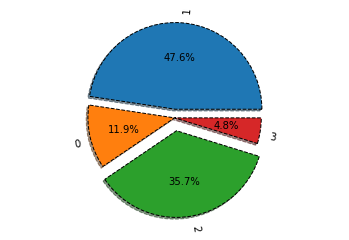

In [10]:
explode = (0.1, 0, 0.15, 0)
fig, ax = plt.subplots()
ax.pie(cnt.values(), labels=cnt.keys(), autopct='%1.1f%%', shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

### Задача 3
Мастер, имея 10 деталей, из которых 3 – нестандартных, проверяет детали одну за другой, пока ему не попадется стандартная. Какова вероятность, что он проверит ровно две детали?


В интернете полученный аналитически ответ 7/30 или 0.23333. Подтверждается ли он эксперементально?

## Решение

In [11]:
details = (0,0,0,0,0,0,0,1,1,1)
count = 0
retries_count = 1000000
for i in tqdm(range(0,retries_count)):
    if random.sample(details, k=2) == [0,1]:
        count += 1
print(count/retries_count)

100%|████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:05<00:00, 171167.96it/s]

0.23316
